In [34]:
#IMPORTS

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run datuslib.ipynb

In [35]:
#SETTINGS

sns.set(rc = {'figure.figsize':(15,5)})
sns.set(font_scale = 1.1)

In [36]:
#CARGA DATA

A_tweets = pd.read_csv(generateAbsolutePath("train.csv"))

In [37]:
#CARGA DE INTERNET PALBRAS NEGATIVAS

NEGATIVE_WORDS = getWordInListFromFile('negativeWords.txt')

In [38]:
#OBTIENE TODAS LAS PALABRAS EN INGLES QUE FIGURAN EN CAMPO text

A_bagOfWords = set(A_tweets['text'].sum().split(' '))

A_bagOfEnglishWords = set()
A_bagOfNonEnglishWords = set()
for word in A_bagOfWords:
    A_processedWord = getEnlgishWord(word)
    if A_processedWord[0] == '1':
        A_bagOfEnglishWords.add(A_processedWord[1:])
    else:
        A_bagOfNonEnglishWords.add(A_processedWord)

# la idea es obtener todas las palabras que indiquen un desastre        
# filtrar las palabras de bagOgValidWords sobre las NEGATIVE_WORDS para ver si hay palabras utiles nuevas
# ver que las palabras que quedan en el set. Si en el queda alguna palabra de desastre que no tenemos en NEGATIVE_WORDS la metemos

# PLOT: Relacionando negatividad de los tweets con si son desastres o no

In [39]:
#MOLDEANDO DATA (1)

A_tweets1 = A_tweets.copy()


#(AGREGA) CAMPO DE TARGET CON NOMBRES MAS DETALLADOS QUE 1 o 0
A_tweets1['target detallado'] = A_tweets1.apply(lambda row : labelDisasterType(row['target']), axis = 1)

#(AGREGA) CAMPO DE LONGITUD DE TWEETS
A_tweets1['length'] = A_tweets1.apply(lambda row : len(row['text']), axis = 1)

#(AGREGA) CAMPO DE PALABRAS NEGATIVAS
A_tweets1['uses negative words'] = A_tweets1.apply(lambda row : int(hasCertainWords(row['text'],NEGATIVE_WORDS)), axis = 1)


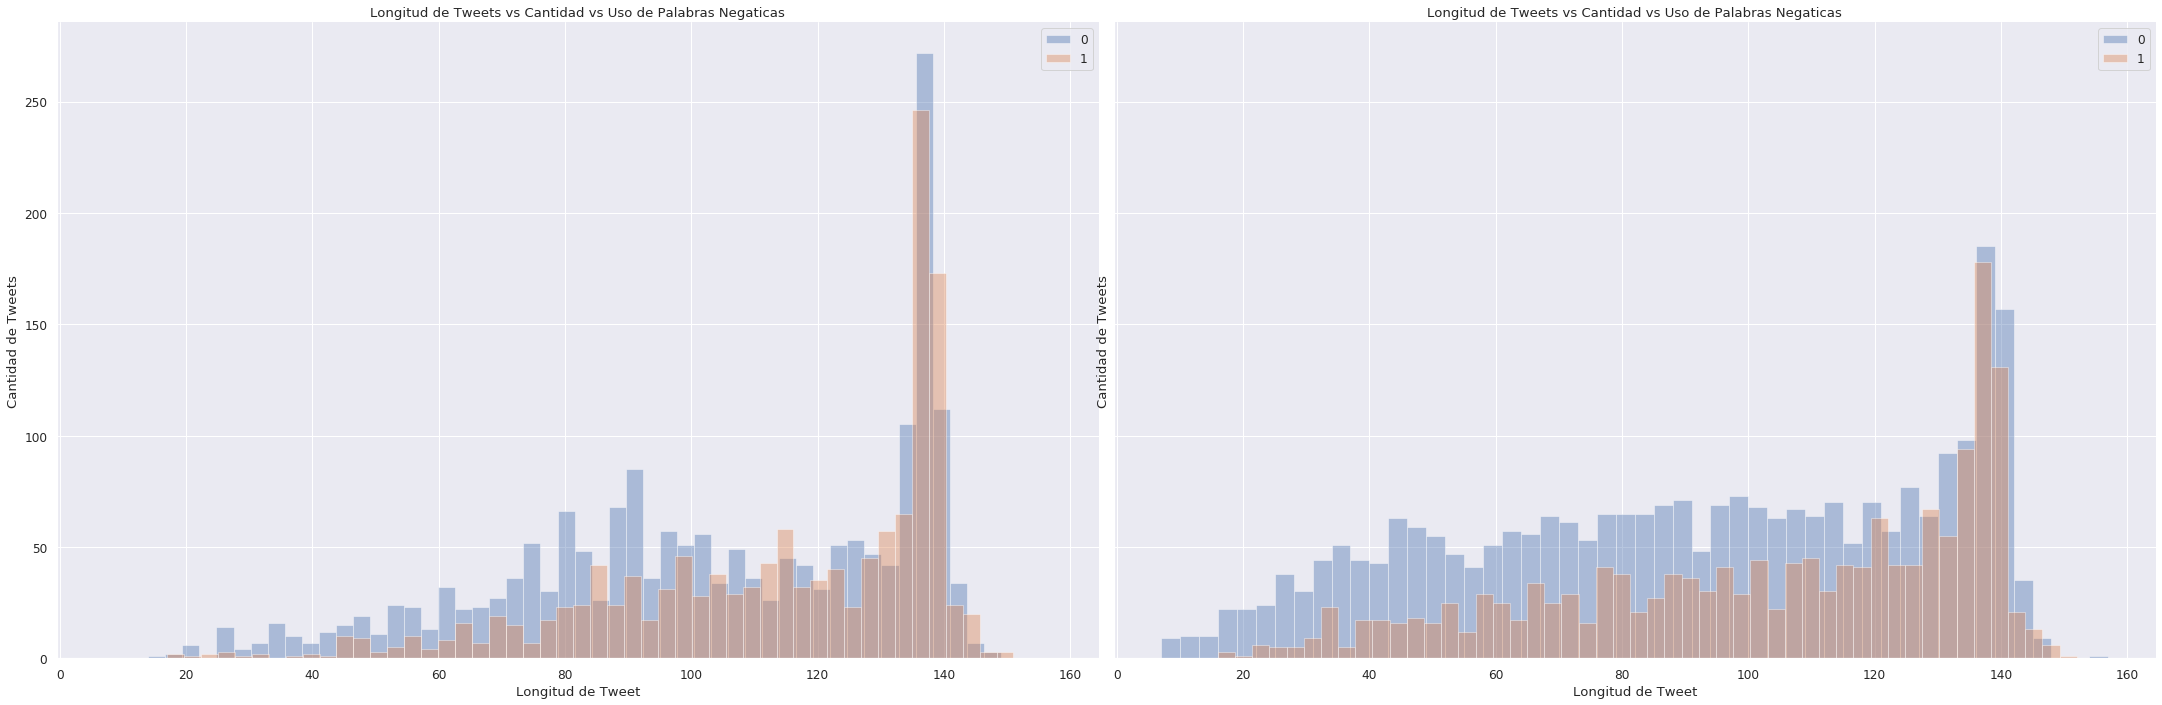

In [40]:
fg1 = sns.FacetGrid(A_tweets1, hue = "uses negative words",col = 'target detallado', height = 10, aspect = 1.5)
v = fg1.map(sns.distplot, "length", kde = False, bins = 50 )
v.set(xlabel = 'Longitud de Tweet', ylabel = 'Cantidad de Tweets', 
      title = 'Longitud de Tweets vs Cantidad vs Uso de Palabras Negaticas')

for ax in v.axes.ravel():
    ax.legend()

# PLOT: Top usuarios mas mencionados en tweets

In [41]:
#BUSCANDO LOS LOS USUARIOS MAS POPULARES

TOP_AMOUNT = 20

A_tweets2 = A_tweets.copy()

A_tweets2['appearing users'] = A_tweets.apply(lambda row : extractUsers(row['text']), axis = 1)
A_tweets2 = A_tweets2[A_tweets2.apply(lambda row : len(row['appearing users']) > 0, axis = 1)]

usuarios = A_tweets2['appearing users'].sum()
frecUsers = {i:usuarios.count(i) for i in usuarios}

usersDF = pd.DataFrame(pd.Series(frecUsers, index = frecUsers.keys()))
usersDF.rename(columns={0:'popularidad'}, inplace=True)

topUsers = usersDF.sort_values('popularidad', ascending = False).head(TOP_AMOUNT)
topUsers = topUsers.reset_index()
topUsers.rename(columns={'index':'user'}, inplace=True)

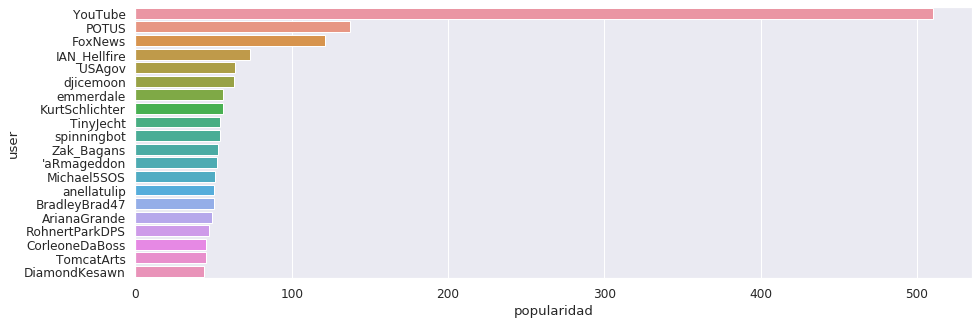

In [42]:
sns.barplot(x = topUsers['popularidad'], y = topUsers['user'], data = topUsers)